In [1]:
!pip install xgboost


In [2]:
!pip install catboost


In [3]:
#libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import plotly.express as px
%matplotlib inline
sns.set()
#preprocess
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
#models
from sklearn.svm import SVC
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from scipy.stats import randint as sp_randint
from sklearn.ensemble import BaggingClassifier,VotingClassifier, AdaBoostClassifier, StackingClassifier, RandomForestClassifier,ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
#check
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, recall_score, precision_score
#save
import pickle as pk

In [4]:
df = pd.read_csv(r"D:/Desktop/Semester 7/machine learning/project/2020/heart_2020_cleaned.csv")
df.head()

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0          30.0          No  Female        55-59  White      Yes   
1           0.0          No  Female  80 or older  White       No   
2          30.0          No    Male        65-69  White      Yes   
3           0.0          No  Female        75-79  White       No   
4           0.0         Yes  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good        5.0    Yes            No        Yes  
1              Yes  Very good        7.0     No            No         No  
2              Yes       Fair        8.0    Yes            No         No  
3               No       Good        6.0     No            No        Yes  
4              Yes  Very good        8.0     No            No         No

In [5]:
df.shape

(319795, 18)

# Explore Data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [7]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

# Check Null Values

In [8]:
df.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [9]:
df['HeartDisease'].value_counts()

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

# Duplicated values

In [10]:
df.duplicated().sum()

18078

In [11]:
#drop duplicates
df.drop_duplicates(inplace=True)

In [12]:
df.shape

(301717, 18)

# Outliers

# Data Analysis & Visualization

([<matplotlib.patches.Wedge at 0x261e3c053c0>,
 [Text(-1.0559821726450649, 0.3080611157803087, 'Yes'),
  Text(1.055982158223682, -0.30806116521440213, 'No')],
 [Text(-0.5759902759882171, 0.16803333588016836, '91%'),
  Text(0.5759902681220083, -0.16803336284421933, '9%')])

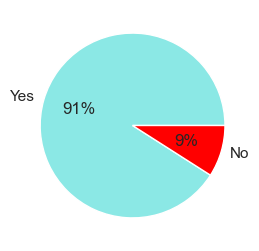

In [13]:
da2=df['HeartDisease'].value_counts().reset_index(name='count')
plt.figure(figsize = (3,3))
plt.pie(da2['count'], labels=['Yes','No'], colors=["#8BE8E5","#FF0000"], autopct='%.0f%%')

In [14]:
fig = px.sunburst(df, path=['Sex','HeartDisease']).update_traces(textinfo='label+percent parent')
fig.show()

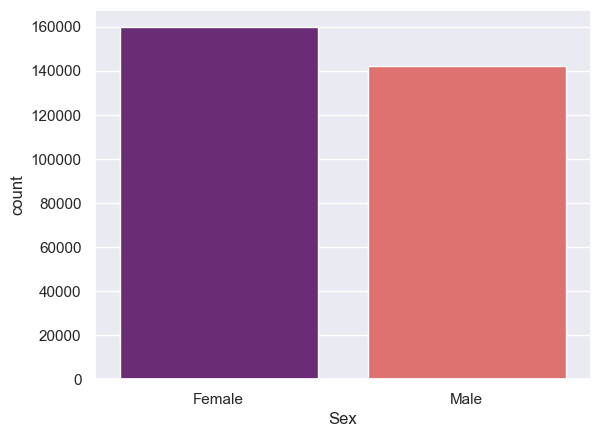

In [15]:
#show how many of Male and female 
sns.countplot(x = df['Sex'], palette='magma')
plt.show()

In [16]:
#AgeCategory frequency
df['AgeCategory'].value_counts()

65-69          31670
60-64          31219
70-74          29273
55-59          27610
50-54          23736
80 or older    23352
75-79          20713
45-49          20518
18-24          19998
40-44          19837
35-39          19526
30-34          17953
25-29          16312
Name: AgeCategory, dtype: int64

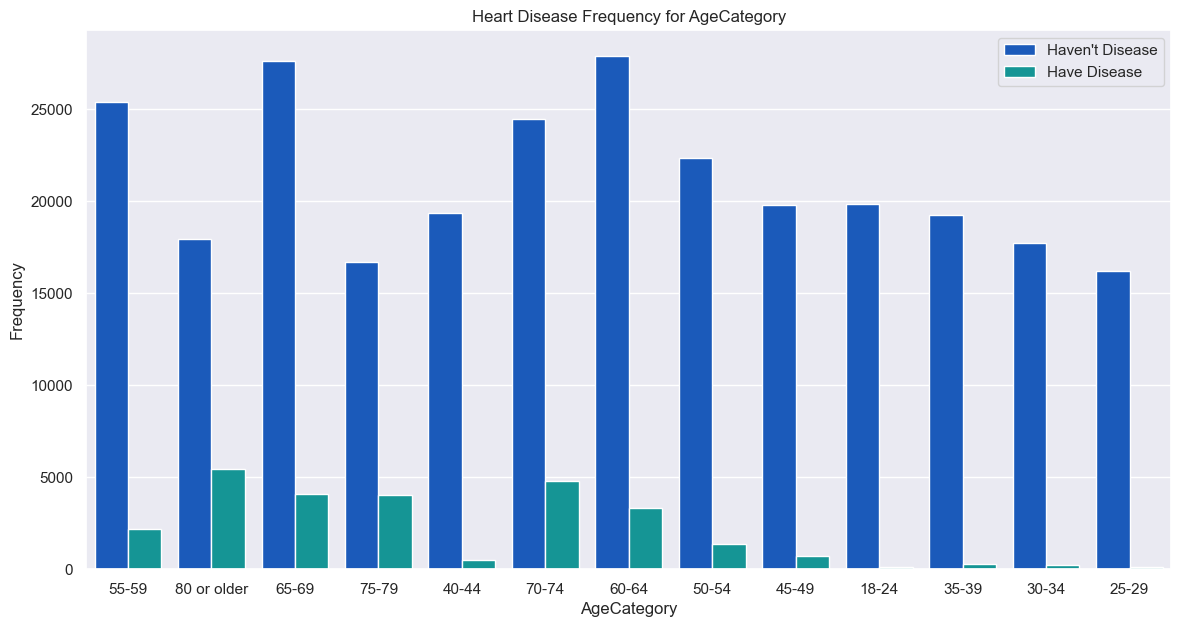

In [17]:
df.groupby(['AgeCategory','HeartDisease'])['HeartDisease'].count()
#show Heart Disease Frequency for AgeCategory
plt.figure(figsize=(14,7))
sns.countplot(x='AgeCategory', data=df, hue='HeartDisease',palette="winter")
plt.title('Heart Disease Frequency for AgeCategory')
plt.xlabel('AgeCategory')
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

In [18]:
#the count of people Smoking
df['Smoking'].value_counts()

No     174312
Yes    127405
Name: Smoking, dtype: int64

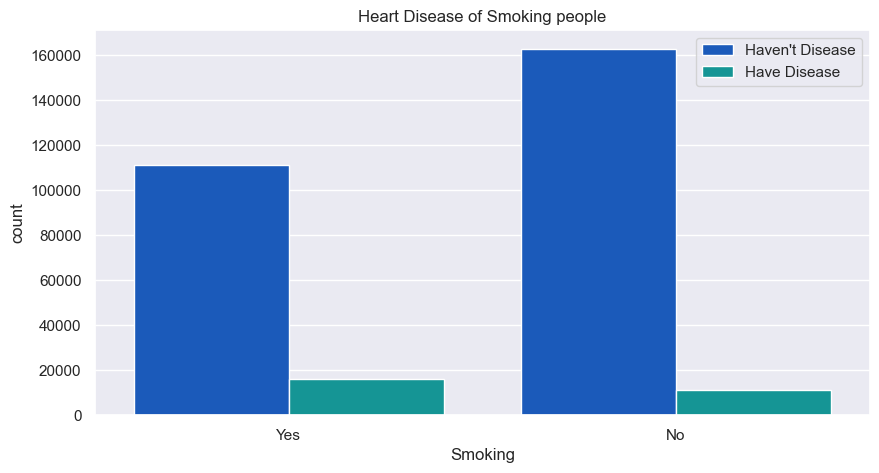

In [19]:
df.groupby(['Sex','AgeCategory','Smoking','HeartDisease'])['HeartDisease'].count()
#show Heart Disease Frequency for Smoking
plt.figure(figsize=(10,5))
sns.countplot(x='Smoking',data=df,hue='HeartDisease',palette='winter')
plt.title('Heart Disease of Smoking people')
plt.legend(["Haven't Disease", "Have Disease"])
plt.xlabel('Smoking')
plt.show()

In [20]:
# people drink the AlcoholDrinking or not 
df['AlcoholDrinking'].value_counts()

No     280136
Yes     21581
Name: AlcoholDrinking, dtype: int64

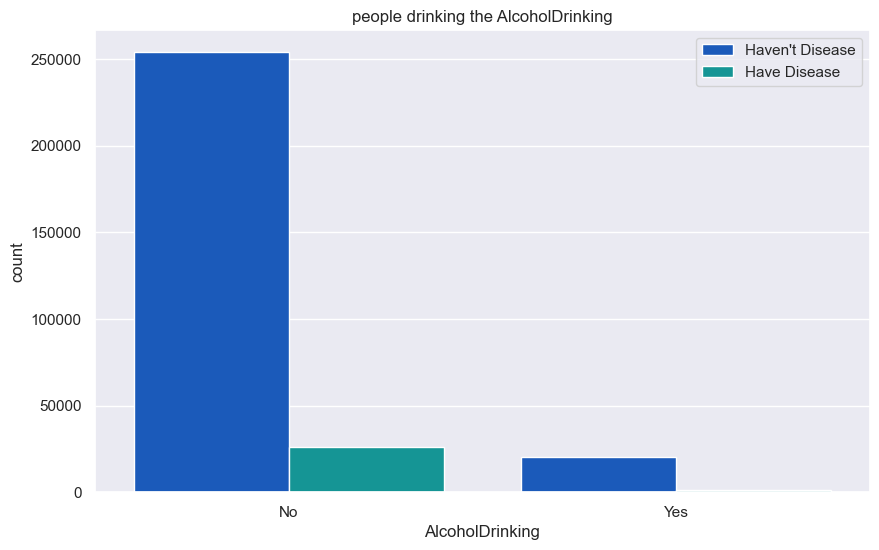

In [21]:
df.groupby(['AlcoholDrinking','HeartDisease'])['HeartDisease'].count()
#Show how many people drink the AlcoholDrinking or not 
plt.figure(figsize=(10,6))
sns.countplot(x=df['AlcoholDrinking'],data=df , hue='HeartDisease',palette='winter')
plt.title('people drinking the AlcoholDrinking')
plt.legend(["Haven't Disease", "Have Disease"])
plt.xlabel('AlcoholDrinking')
plt.show()

In [22]:
df.groupby(['Sex','AgeCategory','AlcoholDrinking','PhysicalActivity','HeartDisease'])['HeartDisease'].count()

Sex     AgeCategory  AlcoholDrinking  PhysicalActivity  HeartDisease
Female  18-24        No               No                No              1419
                                                        Yes                9
                                      Yes               No              6942
                                                        Yes               38
                     Yes              No                No                66
                                                                        ... 
Male    80 or older  No               Yes               Yes             1780
                     Yes              No                No                59
                                                        Yes               34
                                      Yes               No               127
                                                        Yes               41
Name: HeartDisease, Length: 208, dtype: int64

In [23]:
#how many people have KidneyDisease
df['KidneyDisease'].value_counts()

No     289941
Yes     11776
Name: KidneyDisease, dtype: int64

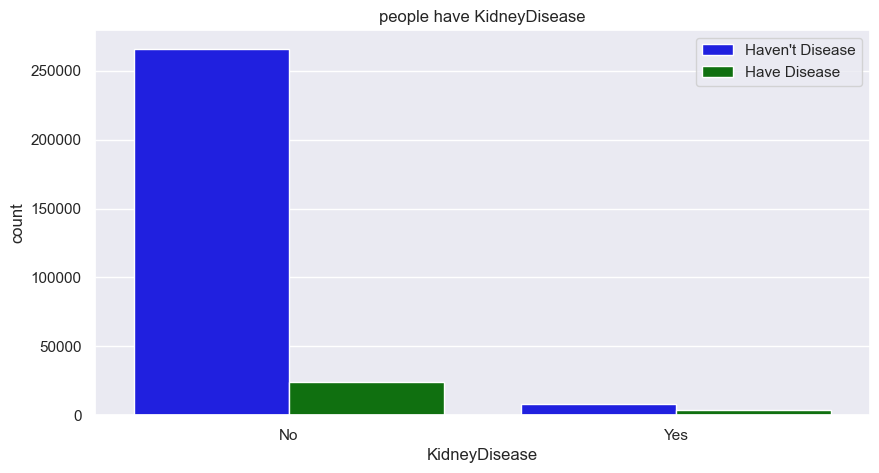

In [24]:
#show the peolple who have KidneyDisease and HeartDisease
df.groupby(['KidneyDisease','HeartDisease'])['HeartDisease'].count()
plt.figure(figsize=(10,5))
sns.countplot( x = 'KidneyDisease', data=df, hue='HeartDisease',palette=['blue','green'])
plt.title('people have KidneyDisease')
plt.legend(["Haven't Disease", "Have Disease"])
plt.show()

In [25]:
df.groupby(['Sex','KidneyDisease'])['KidneyDisease'].count()

Sex     KidneyDisease
Female  No               153218
        Yes                6453
Male    No               136723
        Yes                5323
Name: KidneyDisease, dtype: int64

In [26]:
#Show the SkinCancer  
df['SkinCancer'].value_counts()

No     272425
Yes     29292
Name: SkinCancer, dtype: int64

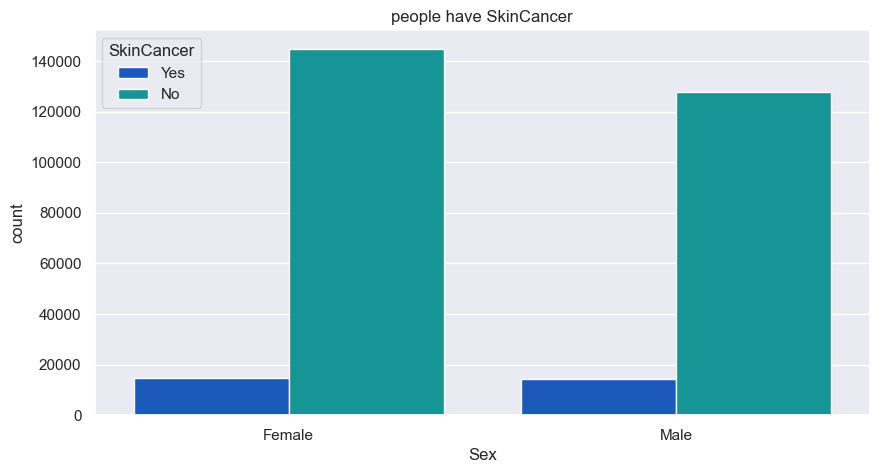

In [27]:
#Show people have SkinCancer
df.groupby(['Sex','SkinCancer'])['SkinCancer'].count()
plt.figure(figsize=(10,5))
sns.countplot(x='Sex',data=df, hue='SkinCancer',palette='winter')
plt.title('people have SkinCancer')
plt.show()

In [28]:
df.groupby(['Sex','SkinCancer','HeartDisease'])['HeartDisease'].count()

Sex     SkinCancer  HeartDisease
Female  No          No              135339
                    Yes               9537
        Yes         No               13119
                    Yes               1676
Male    No          No              114793
                    Yes              12756
        Yes         No               11205
                    Yes               3292
Name: HeartDisease, dtype: int64

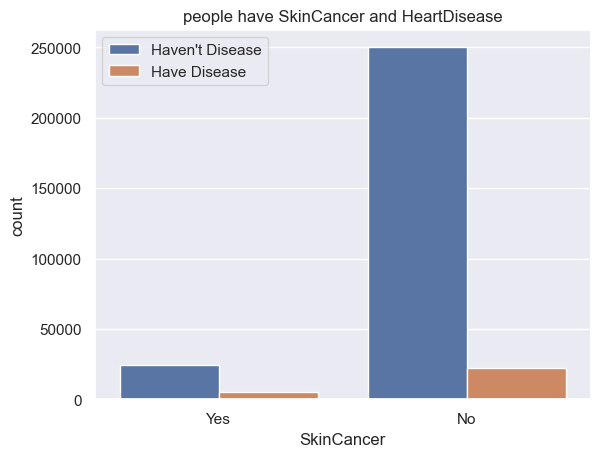

In [29]:
sns.countplot(x = 'SkinCancer', data=df , hue = 'HeartDisease')
plt.title('people have SkinCancer and HeartDisease')
plt.legend(["Haven't Disease", "Have Disease"])
plt.show()

# what is the raio between Heartdisease and GenHealth ?


<Axes: title={'center': 'GenHealth and HeartDisease'}, xlabel='GenHealth', ylabel='count'>

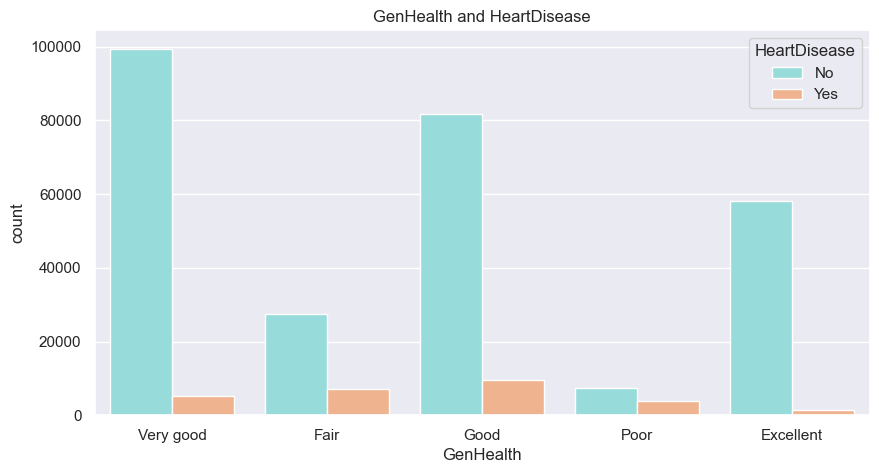

In [30]:
plt.figure(figsize = (10,5))
plt.title("GenHealth and HeartDisease")
sns.countplot(df,x="GenHealth",hue="HeartDisease",palette=["#8BE8E5","#FFB07F"])

C:\Users\Mariam\AppData\Local\Temp\ipykernel_21724\3933821321.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

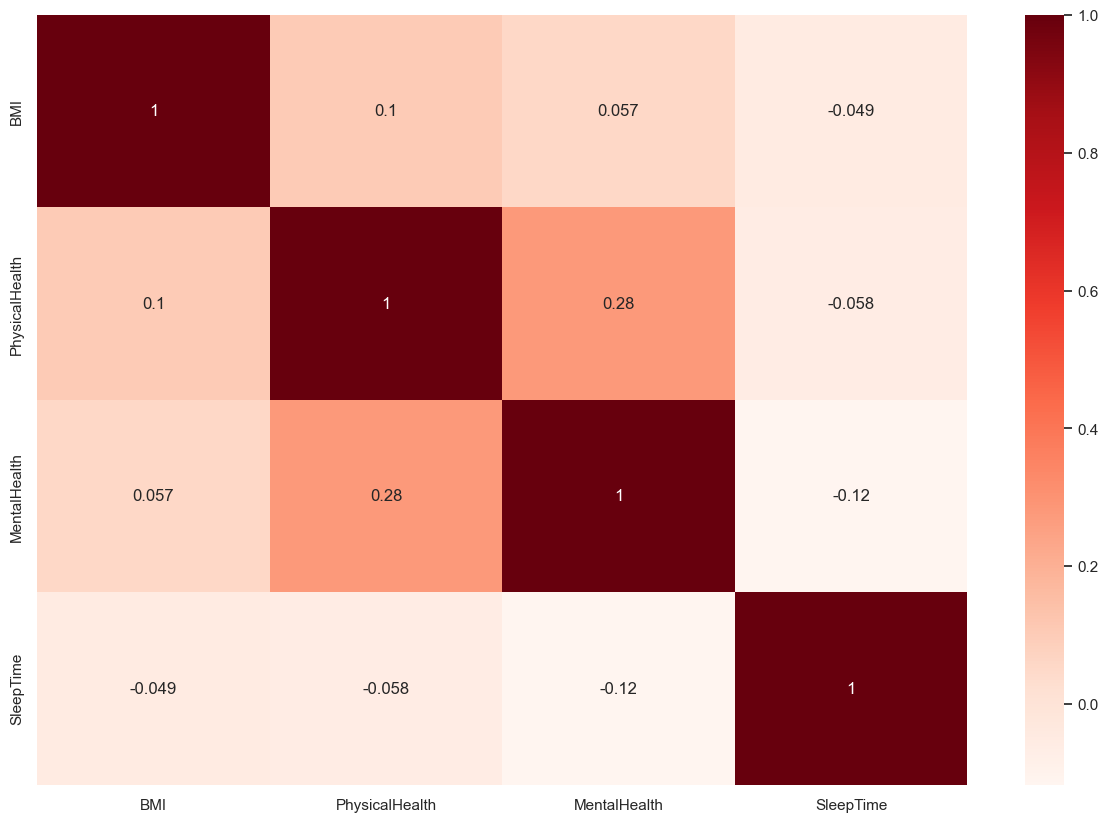

In [31]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(),annot = True,cmap='Reds')

# Check the Distribution and skewness of the features

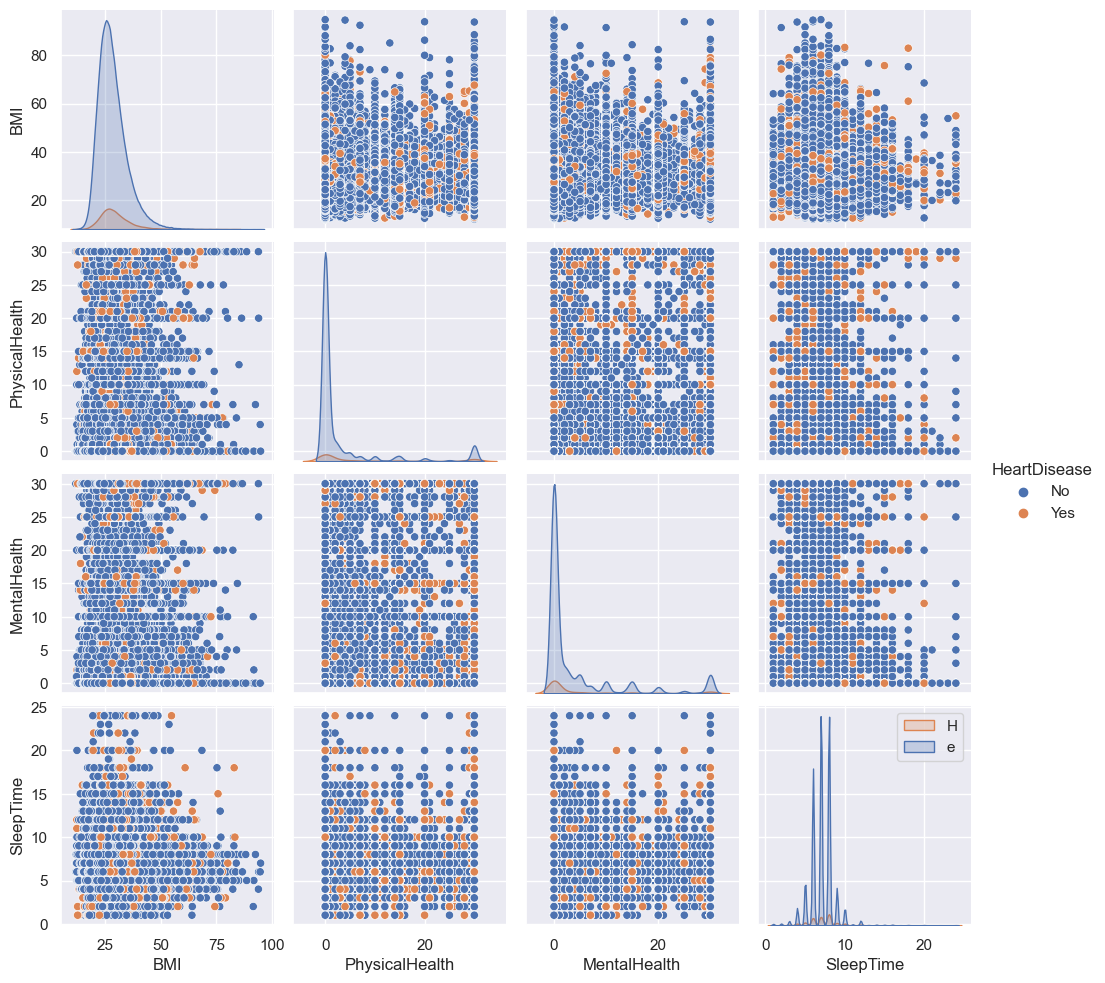

In [32]:
sns.pairplot(data = df , hue= 'HeartDisease')
plt.legend('HeartDisease')


# LabelEncoder for category 

In [33]:
label=LabelEncoder()
for col in df:
    df[col]=label.fit_transform(df[col])
df 

HeartDisease   BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0                  0   223        1                0       0               3   
1                  0   524        0                0       1               0   
2                  0  1103        1                0       0              20   
3                  0   883        0                0       0               0   
4                  0   837        0                0       0              28   
...              ...   ...      ...              ...     ...             ...   
319790             1  1180        1                0       0               7   
319791             0  1397        1                0       0               0   
319792             0   886        0                0       0               0   
319793             0  1658        0                0       0               0   
319794             0  2700        0                0       0               0   

        MentalHealth  DiffWalking  Sex  AgeCategory  Race  Diabetic  \
0                 30            0    0            7     5         2   
1                  0            0    0           12     5         0   
2                 30            0    1            9     5         2   
3                  0            0    0           11     5         0   
4                  0            1    0            4     5         0   
...              ...          ...  ...          ...   ...       ...   
319790             0            1    1            8     3         2   
319791             0            0    1            3     3         0   
319792             0            0    0            5     3         0   
319793             0            0    0            1     3         0   
319794             0            0    0           12     3         0   

        PhysicalActivity  GenHealth  SleepTime  Asthma  KidneyDisease  \
0                      1          4          4       1              0   
1                      1          4          6       0              0   
2                      1          1          7       1              0   
3                      0          2          5       0              0   
4                      1          4          7       0              0   
...                  ...        ...        ...     ...            ...   
319790                 0          1          5       1              0   
319791                 1          4          4       1              0   
319792                 1          2          5       0              0   
319793                 0          2         11       0              0   
319794                 1          2          7       0              0   

        SkinCancer  
0                1  
1                0  
2                0  
3                1  
4                0  
...            ...  
319790           0  
319791           0  
319792           0  
319793           0  
319794           0  

[301717 rows x 18 columns]

In [34]:
x = df.drop('HeartDisease',axis=1)
y = df[['HeartDisease']]

In [35]:
x.shape

(301717, 17)

In [36]:
y.value_counts()

HeartDisease
0               274456
1                27261
dtype: int64

In [37]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size=.70,random_state=42) 

In [38]:
Clf = DecisionTreeClassifier() 

In [39]:
Clf.fit(xtrain,ytrain) 

DecisionTreeClassifier()

In [40]:
Clf.score(xtest,ytest) # before sampling

0.8545671483494631

In [41]:
Clf.score(x,y) #before sampling

0.9546396126171214

# Over Sampling

In [42]:
over = RandomOverSampler(random_state=42)

In [43]:
x_new , y_new = over.fit_resample(x,y)

# Hold Out Cross Validation

In [44]:
xtrain, xtest, ytrain, ytest = train_test_split(x_new, y_new, train_size=.70,random_state=42) 

In [45]:
dt = DecisionTreeClassifier() 

In [46]:
dt.fit(xtrain,ytrain) 

DecisionTreeClassifier()

In [47]:
dt.score(xtest,ytest) # after sampling

0.9483828655404011

In [48]:
dt.score(xtrain,ytrain) # after sampling

0.9979361749748854

# Random Forest

In [49]:
# Focal cell:
rf = RandomForestClassifier()

# Train the random forest model
rf.fit(xtrain, ytrain)

# Calculate the accuracy score on the training data
train_score = rf.score(xtrain, ytrain)
print("Training accuracy:", train_score)

# Calculate the accuracy score on the testing data
test_score = rf.score(xtest, ytest)
print("Testing accuracy:", test_score)


C:\Users\Mariam\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Training accuracy: 0.9979335724212597
Testing accuracy: 0.9640198209796325


In [50]:
# Create an instance of XGBClassifier
xgb = XGBClassifier()

# Fit the model on the training data
xgb.fit(xtrain, ytrain)

# Calculate the accuracy score on the training data
train_score = xgb.score(xtrain, ytrain)
print("Training accuracy:", train_score)

# Calculate the accuracy score on the test data
test_score = xgb.score(xtest, ytest)
print("Testing accuracy:", test_score)

Training accuracy: 0.7884852617388182
Testing accuracy: 0.7823517980980604


# K Fold Cross Validation

In [51]:
kfold = KFold(n_splits=5, shuffle=True) #each fold contain 25% data

In [52]:
result = cross_val_score(rf, x_new, y_new, cv=kfold) 

C:\Users\Mariam\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Mariam\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Mariam\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Mariam\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Mariam\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning:

A column-vector y 

In [53]:
result

array([0.96784566, 0.96835576, 0.96782715, 0.96902953, 0.96795467])

In [54]:
result.mean()

0.9682025537858383

In [55]:
result.max()

0.9690295312528465

In [56]:
result.min()

0.9678271483485453

# dimantionally reduction using pca

In [57]:
mmx = MinMaxScaler()

In [58]:
scaled_x = mmx.fit_transform(x_new)

In [59]:
scaled_x.shape

(548912, 17)

In [60]:
scaled_x

array([[0.06189287, 1.        , 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.14543436, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.30613378, 1.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.18262559, 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.19816819, 1.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.3719123 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

#  PCA

In [61]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
x_pca = pca.fit_transform(scaled_x)

In [62]:
x_pca

array([[ 0.24427814,  0.14220526, -0.79493622],
       [-0.43073462,  0.57811896, -0.08678342],
       [ 0.35471596, -0.5464794 , -0.18495641],
       ...,
       [-0.16440002,  0.01222089, -0.88625792],
       [-0.08608535, -0.84390802, -0.1123021 ],
       [-0.6942283 , -0.19401373,  0.42682639]])

In [63]:
features = pd.DataFrame(x_pca, columns=['pca1','pca2','pca3'])

In [64]:
xtrain, xtest, ytrain, ytest = train_test_split(features, y_new, train_size=.70,random_state=42) 

In [65]:
xtrain

pca1      pca2      pca3
78195  -0.649439  0.629727 -0.155841
17062  -0.574143  0.616581 -0.153377
158180 -0.664681  0.647961 -0.147028
333159 -0.189711 -0.754318 -0.204133
357122 -0.319733 -0.721555 -0.268547
...          ...       ...       ...
110268 -0.693393 -0.194281  0.433143
259178  0.488254  0.354794 -0.655461
365838  1.238360 -0.490820  0.426178
131932  0.817201  0.991225  0.348068
121958 -0.586555  0.586528 -0.144474

[384238 rows x 3 columns]

# Linear SGDClassifier

In [66]:
from sklearn.linear_model import SGDClassifier
# Create an instance of SGDClassifier
lsgd = SGDClassifier()

# Fit the model to the training data
lsgd.fit(xtrain, ytrain)

# Evaluate the model on the testing data
testing_score = lsgd.score(xtest, ytest)
print("Testing score:", testing_score)

# Evaluate the model on the training data
training_score = lsgd.score(xtrain, ytrain)
print("Training score:", training_score)

C:\Users\Mariam\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Testing score: 0.6657213646355831
Training score: 0.6666961622744236


# KNeighborsClassifier

In [67]:
# Create a KNN classifier object with 100 neighbors
knn = KNeighborsClassifier(n_neighbors=100)

# Train the classifier using the training data
knn.fit(xtrain, ytrain)

# Calculate the accuracy score on the test data
testing_score= knn.score(xtest, ytest)  # testing
print("Testing score:", testing_score)

# Calculate the accuracy score on the training data
training_score= knn.score(xtrain, ytrain)  # training
print("Training score:", training_score)

C:\Users\Mariam\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Testing score: 0.7491650169425653
Training score: 0.7540899130226578


# XGBClassifier

In [68]:
# Create an instance of XGBClassifier
xgb = XGBClassifier()

# Fit the model on the training data
xgb.fit(xtrain, ytrain)

# Calculate the accuracy score on the training data
train_score = xgb.score(xtrain, ytrain)
print("Training accuracy:", train_score)

# Calculate the accuracy score on the test data
test_score = xgb.score(xtest, ytest)
print("Testing accuracy:", test_score)

Training accuracy: 0.7588655989256659
Testing accuracy: 0.754217423515552


# RandomForestClassifier

In [69]:
# Focal cell:
rf = RandomForestClassifier()

# Train the random forest model
rf.fit(xtrain, ytrain)

# Calculate the accuracy score on the training data
train_score = rf.score(xtrain, ytrain)
print("Training accuracy:", train_score)

# Calculate the accuracy score on the testing data
test_score = rf.score(xtest, ytest)
print("Testing accuracy:", test_score)

C:\Users\Mariam\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Training accuracy: 0.9979231622067573
Testing accuracy: 0.960188007821514


# ExtraTreesClassifier

In [70]:
# Create an instance of the ExtraTreesClassifier
extr = ExtraTreesClassifier()

# Fit the model to the training data
extr.fit(xtrain, ytrain)

# Evaluate the model on the testing data
test_score = extr.score(xtest, ytest)
print("Testing Score:", test_score)

# Evaluate the model on the training data
train_score = extr.score(xtrain, ytrain)
print("Training Score:", train_score)

C:\Users\Mariam\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Testing Score: 0.9757824550323669
Training Score: 0.9979361749748854


# DecisionTreeClassifier

In [71]:
# Create an instance of the DecisionTreeClassifier
dt = DecisionTreeClassifier() 

# Fit the model to the training data
dt.fit(xtrain,ytrain)

# Evaluate the model on the testing data
test_score= dt.score(xtest,ytest) # after sampling
print("Testing Score:", test_score)

# Evaluate the model on the training data
train_score= dt.score(xtrain,ytrain) # after sampling
print("Training Score:", train_score)

Testing Score: 0.9467918432782346
Training Score: 0.9979361749748854


# LogisticRegression

In [72]:
# Create a Logistic Regression model
lg = LogisticRegression()

# Train the model on the training data
lg.fit(xtrain, ytrain)

# Calculate the accuracy score on the test data
test_score = lg.score(xtest, ytest)
print("Testing Score:", test_score)
# Calculate the accuracy score on the training data
train_score = lg.score(xtrain, ytrain)
print("Training Score:", train_score)


Testing Score: 0.6819655804802215
Training Score: 0.6819939724858031


C:\Users\Mariam\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



# classification model

In [73]:
# Split data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x_new, y_new, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

# Initialize and train classification models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'ExtraTreesClassifier': ExtraTreesClassifier(),
    'XGBClassifier': XGBClassifier()
   
}

for model_name, model in models.items():
    # Train the model
    model.fit(xtrain, ytrain)

    # Make predictions
    y_pred = model.predict(xtest)

    # Evaluate accuracy
    accuracy = accuracy_score(ytest, y_pred)
    print(f'{model_name} Accuracy: {accuracy:.4f}')


Decision Tree Accuracy: 0.9484


C:\Users\Mariam\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Random Forest Accuracy: 0.9645


C:\Users\Mariam\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Logistic Regression Accuracy: 0.7465


C:\Users\Mariam\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



ExtraTreesClassifier Accuracy: 0.9720
XGBClassifier Accuracy: 0.7824


# Ensemble 

In [74]:
# Bagging
bagging_model = RandomForestClassifier(n_estimators=10, random_state=42)
bagging_model.fit(xtrain, ytrain)
bagging_pred = bagging_model.predict(xtest)
print("Bagging Accuracy:", accuracy_score(ytest, bagging_pred))

# Boosting
boosting_model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, random_state=42)
boosting_model.fit(xtrain, ytrain)
boosting_pred = boosting_model.predict(xtest)
print("Boosting Accuracy:", accuracy_score(ytest, boosting_pred))

# Stacking
base_models = [
    ('decision_tree', DecisionTreeClassifier()),
    ('logistic_regression', LogisticRegression())
]
stacking_model = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())
stacking_model.fit(xtrain, ytrain)
stacking_pred = stacking_model.predict(xtest)
print("Stacking Accuracy:", accuracy_score(ytest, stacking_pred))


C:\Users\Mariam\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Bagging Accuracy: 0.9640016031674703
0:	learn: 0.6660492	total: 157ms	remaining: 15.6s
1:	learn: 0.6438293	total: 176ms	remaining: 8.64s
2:	learn: 0.6241526	total: 208ms	remaining: 6.74s
3:	learn: 0.6083182	total: 240ms	remaining: 5.75s
4:	learn: 0.5948727	total: 266ms	remaining: 5.06s
5:	learn: 0.5831977	total: 301ms	remaining: 4.71s
6:	learn: 0.5731076	total: 328ms	remaining: 4.36s
7:	learn: 0.5641775	total: 365ms	remaining: 4.2s
8:	learn: 0.5566517	total: 386ms	remaining: 3.9s
9:	learn: 0.5495376	total: 411ms	remaining: 3.7s
10:	learn: 0.5431511	total: 444ms	remaining: 3.6s
11:	learn: 0.5379985	total: 466ms	remaining: 3.42s
12:	learn: 0.5331793	total: 492ms	remaining: 3.29s
13:	learn: 0.5291511	total: 520ms	remaining: 3.2s
14:	learn: 0.5255247	total: 555ms	remaining: 3.15s
15:	learn: 0.5221504	total: 577ms	remaining: 3.03s
16:	learn: 0.5194887	total: 611ms	remaining: 2.98s
17:	learn: 0.5166701	total: 645ms	remaining: 2.94s
18:	learn: 0.5145607	total: 671ms	remaining: 2.86s
19:	learn

C:\Users\Mariam\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Mariam\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Stacking Accuracy: 0.9482796312714818


# Modeling

In [75]:
def evaluate_model(model, xtest, ytest):
   
    # Predict Test Data 
    ypred = model.predict(xtest)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(ytest, ypred)
    prec = metrics.precision_score(ytest, ypred)
    rec = metrics.recall_score(ytest, ypred)
    f1 = metrics.f1_score(ytest, ypred)
    kappa = metrics.cohen_kappa_score(ytest, ypred)

    # Calculate area under curve (AUC)
    ypred_proba = model.predict_proba(xtest)[::,1]
    fpr, tpr, _ = metrics.roc_curve(ytest, ypred_proba)
    auc = metrics.roc_auc_score(ytest, ypred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(ytest, ypred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

In [76]:
xtrain

array([[-0.76049382, -0.99107662, -0.249487  , ..., -0.43410063,
        -0.29095031, -0.39599276],
       [ 0.64561895, -0.99107662, -0.249487  , ..., -0.43410063,
        -0.29095031, -0.39599276],
       [-0.86879755, -0.99107662, -0.249487  , ..., -0.43410063,
        -0.29095031, -0.39599276],
       ...,
       [ 0.63460502,  1.00900373, -0.249487  , ..., -0.43410063,
        -0.29095031, -0.39599276],
       [-0.05193047, -0.99107662, -0.249487  , ...,  2.30361331,
        -0.29095031, -0.39599276],
       [-1.27814892, -0.99107662, -0.249487  , ..., -0.43410063,
        -0.29095031, -0.39599276]])

In [77]:
# Building a model using KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(xtrain, ytrain)


# Evaluate Model
knn_eval = evaluate_model(knn, xtest, ytest)

# Print result
print('Accuracy:', knn_eval['acc'])
print('Precision:', knn_eval['prec'])
print('Recall:', knn_eval['rec'])
print('F1 Score:', knn_eval['f1'])
print('Cohens Kappa Score:', knn_eval['kappa'])
print('Area Under Curve:', knn_eval['auc'])
print('Confusion Matrix:\n', knn_eval['cm'])

C:\Users\Mariam\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Accuracy: 0.8784993380861581
Precision: 0.8106979933808403
Recall: 0.9883558905138675
F1 Score: 0.8907550177998121
Cohens Kappa Score: 0.7568714947366632
Area Under Curve: 0.9410372828918991
Confusion Matrix:
 [[63096 19047]
 [  961 81570]]


In [78]:
# Building a model using KNeighborsClassifier 
rf1 = RandomForestClassifier()

rf1.fit(xtrain, ytrain)

# Evaluate Model
rf1_eval = evaluate_model(rf1, xtest, ytest)

# Print result
print('Accuracy:', rf1_eval['acc'])
print('Precision:', rf1_eval['prec'])
print('Recall:', rf1_eval['rec'])
print('F1 Score:', rf1_eval['f1'])
print('Cohens Kappa Score:', rf1_eval['kappa'])
print('Area Under Curve:', rf1_eval['auc'])
print('Confusion Matrix:\n', rf1_eval['cm'])

C:\Users\Mariam\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Accuracy: 0.9643963224309848
Precision: 0.9342910227942176
Recall: 0.9992366504707322
F1 Score: 0.9656731011305687
Cohens Kappa Score: 0.9287805573157841
Area Under Curve: 0.9965916303659526
Confusion Matrix:
 [[76343  5800]
 [   63 82468]]


In [79]:
# Building a model using KNeighborsClassifier 
extra = ExtraTreesClassifier()

extra.fit(xtrain, ytrain)


# Evaluate Model
extra_eval = evaluate_model(extra, xtest, ytest)

# Print result
print('Accuracy:', extra_eval['acc'])
print('Precision:', extra_eval['prec'])
print('Recall:', extra_eval['rec'])
print('F1 Score:', extra_eval['f1'])
print('Cohens Kappa Score:', extra_eval['kappa'])
print('Area Under Curve:', extra_eval['auc'])
print('Confusion Matrix:\n', extra_eval['cm'])

C:\Users\Mariam\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Accuracy: 0.97190813364587
Precision: 0.9476424147005758
Recall: 0.9991518338563691
F1 Score: 0.9727156911317147
Cohens Kappa Score: 0.9438087419494223
Area Under Curve: 0.9971081189870648
Confusion Matrix:
 [[77587  4556]
 [   70 82461]]


In [80]:
# Building a model using KNeighborsClassifier 
xgb = XGBClassifier()

xgb.fit(xtrain, ytrain)


# Evaluate Model
xgb_eval = evaluate_model(xgb, xtest, ytest)

# Print result
print('Accuracy:', xgb_eval['acc'])
print('Precision:', xgb_eval['prec'])
print('Recall:', xgb_eval['rec'])
print('F1 Score:', xgb_eval['f1'])
print('Cohens Kappa Score:', xgb_eval['kappa'])
print('Area Under Curve:', xgb_eval['auc'])
print('Confusion Matrix:\n', xgb_eval['cm'])

Accuracy: 0.7823517980980604
Precision: 0.7597178648510335
Recall: 0.8274224230895058
F1 Score: 0.7921260664551639
Cohens Kappa Score: 0.564609541608373
Area Under Curve: 0.8612647252012491
Confusion Matrix:
 [[60545 21598]
 [14243 68288]]


In [81]:
# Building a model using KNeighborsClassifier 
dt1= DecisionTreeClassifier(random_state=0)
dt1.fit(xtrain, ytrain)


# Evaluate Model
dt1_eval = evaluate_model(rf1, xtest, ytest)

# Print result
print('Accuracy:', dt1_eval['acc'])
print('Precision:', dt1_eval['prec'])
print('Recall:', dt1_eval['rec'])
print('F1 Score:', dt1_eval['f1'])
print('Cohens Kappa Score:', dt1_eval['kappa'])
print('Area Under Curve:', dt1_eval['auc'])
print('Confusion Matrix:\n', dt1_eval['cm'])

Accuracy: 0.9643963224309848
Precision: 0.9342910227942176
Recall: 0.9992366504707322
F1 Score: 0.9656731011305687
Cohens Kappa Score: 0.9287805573157841
Area Under Curve: 0.9965916303659526
Confusion Matrix:
 [[76343  5800]
 [   63 82468]]


In [ ]:

# Split the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x_new, y_new, test_size=0.3, random_state=42)

# Define the individual models
model1 = DecisionTreeClassifier(random_state=42)
model2 = RandomForestClassifier()
model3 = ExtraTreesClassifier()

# Create the VotingClassifier ensemble
ensemble = VotingClassifier(
    estimators=[('dt1', model1),('rf1', model2),('extra', model3) ],
    voting='hard'  # You can also use 'soft' voting
)

# Train the ensemble model
ensemble.fit(xtrain, ytrain)

# Make predictions on the test set
y_pred = ensemble.predict(xtest)
print("y_prediction:", y_pred)

# Calculate the accuracy of the ensemble model
accuracy = accuracy_score(ytest, y_pred)
print("Accuracy:", accuracy)